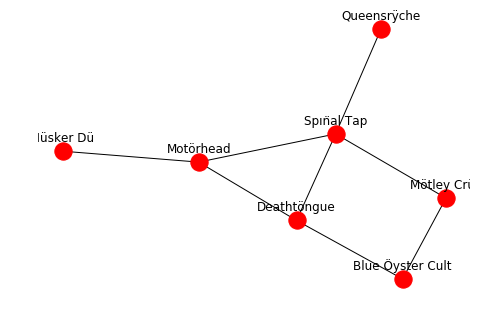

In [2]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import graphicML
import matplotlib.pyplot as plt

%matplotlib inline

try:
    hd = 'H' + unichr(252) + 'sker D' + unichr(252)
    mh = 'Mot' + unichr(246) + 'rhead'
    mc = 'M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st = 'Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q = 'Queensr' + unichr(255) + 'che'
    boc = 'Blue ' + unichr(214) + 'yster Cult'
    dt = 'Deatht' + unichr(246) + 'ngue'
except NameError:
    hd = 'H' + chr(252) + 'sker D' + chr(252)
    mh = 'Mot' + chr(246) + 'rhead'
    mc = 'M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st = 'Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q = 'Queensr' + chr(255) + 'che'
    boc = 'Blue ' + chr(214) + 'yster Cult'
    dt = 'Deatht' + chr(246) + 'ngue'

G = nx.Graph()
G.add_edge(hd, mh)
G.add_edge(mc, st)
G.add_edge(boc, mc)
G.add_edge(boc, dt)
G.add_edge(st, dt)
G.add_edge(q, st)
G.add_edge(dt, mh)
G.add_edge(st, mh)

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.figure(figsize=(16,9))
plt.show()

In [3]:
GA = graphicML.Attribute(G)
df = GA.graph_attributes()
df.head()

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment,node_x,degree_centrality_x,closeness_centrality_x,betweenness_centrality_x,pagerank_x,node_y,degree_centrality_y,closeness_centrality_y,betweenness_centrality_y,pagerank_y
0,Hüsker Dü,Motörhead,1,1.000000,0.000000,0.000000,0.000000,3,Hüsker Dü,0.166667,0.428571,0.0,0.07403,Motörhead,0.500000,0.666667,0.350000,0.185654
1,Hüsker Dü,Mötley Crüe,3,0.333333,0.000000,0.000000,0.000000,2,Hüsker Dü,0.166667,0.428571,0.0,0.07403,Mötley Crüe,0.333333,0.545455,0.058333,0.125488
2,Hüsker Dü,Spın̈al Tap,2,0.500000,0.250000,0.333333,0.910239,4,Hüsker Dü,0.166667,0.428571,0.0,0.07403,Spın̈al Tap,0.666667,0.750000,0.583333,0.239249
3,Hüsker Dü,Blue Öyster Cult,3,0.333333,0.000000,0.000000,0.000000,2,Hüsker Dü,0.166667,0.428571,0.0,0.07403,Blue Öyster Cult,0.333333,0.500000,0.038889,0.125219
4,Hüsker Dü,Deathtöngue,2,0.500000,0.333333,0.333333,0.910239,3,Hüsker Dü,0.166667,0.428571,0.0,0.07403,Deathtöngue,0.500000,0.666667,0.213889,0.178090


In [11]:
df = df.drop(['node_x', 'node_y'], axis=1)
df.head()

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment,degree_centrality_x,closeness_centrality_x,betweenness_centrality_x,pagerank_x,degree_centrality_y,closeness_centrality_y,betweenness_centrality_y,pagerank_y
0,Hüsker Dü,Motörhead,1,1.000000,0.000000,0.000000,0.000000,3,0.166667,0.428571,0.0,0.07403,0.500000,0.666667,0.350000,0.185654
1,Hüsker Dü,Mötley Crüe,3,0.333333,0.000000,0.000000,0.000000,2,0.166667,0.428571,0.0,0.07403,0.333333,0.545455,0.058333,0.125488
2,Hüsker Dü,Spın̈al Tap,2,0.500000,0.250000,0.333333,0.910239,4,0.166667,0.428571,0.0,0.07403,0.666667,0.750000,0.583333,0.239249
3,Hüsker Dü,Blue Öyster Cult,3,0.333333,0.000000,0.000000,0.000000,2,0.166667,0.428571,0.0,0.07403,0.333333,0.500000,0.038889,0.125219
4,Hüsker Dü,Deathtöngue,2,0.500000,0.333333,0.333333,0.910239,3,0.166667,0.428571,0.0,0.07403,0.500000,0.666667,0.213889,0.178090


In [4]:
node = GA.node()
node.head()

,node,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
0,Hüsker Dü,0.166667,0.428571,0.000000,0.074030
1,Motörhead,0.500000,0.666667,0.350000,0.185654
2,Mötley Crüe,0.333333,0.545455,0.038889,0.125488
3,Spın̈al Tap,0.666667,0.750000,0.544444,0.239249
4,Blue Öyster Cult,0.333333,0.500000,0.038889,0.125219


In [7]:
edge = GA.edge()
edge

,source,target,shortest_path_length,efficiency,jaccard_coefficient,resource_allocation_index,adamic_adar_index,preferential_attachment
0,Hüsker Dü,Motörhead,1,1.000000,0.000000,0.000000,0.000000,3
1,Hüsker Dü,Mötley Crüe,3,0.333333,0.000000,0.000000,0.000000,2
2,Hüsker Dü,Spın̈al Tap,2,0.500000,0.250000,0.333333,0.910239,4
3,Hüsker Dü,Blue Öyster Cult,3,0.333333,0.000000,0.000000,0.000000,2
4,Hüsker Dü,Deathtöngue,2,0.500000,0.333333,0.333333,0.910239,3
5,Hüsker Dü,Queensrÿche,3,0.333333,0.000000,0.000000,0.000000,1
6,Motörhead,Mötley Crüe,2,0.500000,0.250000,0.250000,0.721348,6
7,Motörhead,Spın̈al Tap,1,1.000000,0.166667,0.333333,0.910239,12
8,Motörhead,Blue Öyster Cult,2,0.500000,0.250000,0.333333,0.910239,6
9,Motörhead,Deathtöngue,1,1.000000,0.200000,0.250000,0.721348,9
